LOAD PYTHON PACKAGES

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install indic-nlp-library

   тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 40.3/40.3 kB 1.5 MB/s eta 0:00:00
   тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 7.7/7.7 MB 23.4 MB/s eta 0:00:00
   тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 587.4/587.4 kB 17.3 MB/s eta 0:00:00
   тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 3.5/3.5 MB 28.6 MB/s eta 0:00:00
   тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 121.1/121.1 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found exi

In [ ]:
!pip install punjabi_stopwords

In [ ]:
!pip install LiHiSTO

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for LiHiSTO: filename=LiHiSTO-0.0.2-py3-none-any.whl size=6622 sha256=e4daf6dc9c171179d056e9b24fe21d6fad584ba35b367457d1163a4098b55f4d
  Stored in directory: /root/.cache/pip/wheels/30/4b/ee/9455c8f022cf1934fe774cbfd84b699cacca35d6fce0b7f60e
Successfully built LiHiSTO


In [ ]:
!pip install emoji

   тФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБтФБ 586.9/586.9 kB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

In [ ]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
from indicnlp.tokenize import indic_tokenize
from punjabi_stopwords import remove_stopwords
from stopwords_hindi import hindi_sw
import emoji
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

LOAD DATA INTO MEMORY

In [ ]:
tweets_file_name = 'farmers-protest-tweets.json'

tweets_set = []
with open(tweets_file_name, 'r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_set.append(tweet)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

print(f"Successfully loaded {len(tweets_set)} tweets.")

Successfully loaded 117407 tweets.


In [ ]:
language_count = {}

for tweet in tweets_set:
    lang = tweet.get('lang', 'unknown')  # Obtaining the language "unkown" in case it does not exist
    if lang in language_count:
        language_count[lang] += 1  # Increment de language count in case it is already in the dictionary
    else:
        language_count[lang] = 1  # Initialize the key in the dictionary
sorted_language_count = sorted(language_count.items(), key=lambda item: item[1], reverse=True)

for lang, count in sorted_language_count:
    print(f"{lang}: {count} tweets")


en: 48429 tweets
und: 35372 tweets
hi: 17880 tweets
pa: 10028 tweets
in: 1823 tweets
tl: 527 tweets
et: 524 tweets
ta: 451 tweets
kn: 265 tweets
ht: 222 tweets
mr: 187 tweets
es: 176 tweets
ur: 131 tweets
gu: 126 tweets
ml: 110 tweets
te: 103 tweets
fr: 92 tweets
tr: 86 tweets
it: 73 tweets
bn: 73 tweets
pt: 69 tweets
da: 64 tweets
hu: 60 tweets
de: 58 tweets
fi: 54 tweets
ne: 50 tweets
nl: 44 tweets
sl: 39 tweets
ca: 35 tweets
ro: 32 tweets
sv: 31 tweets
eu: 30 tweets
lv: 30 tweets
cy: 25 tweets
no: 22 tweets
cs: 21 tweets
or: 18 tweets
lt: 14 tweets
pl: 11 tweets
is: 7 tweets
vi: 5 tweets
ja: 4 tweets
ru: 3 tweets
ar: 1 tweets
fa: 1 tweets
si: 1 tweets


PREPROCESS THE DOCUMENT:

Removing stop words
тЧП Tokenization
тЧП Removing punctuation marks
тЧП Stemming
тЧП and... anything else you think it's needed (bonus point)

In [ ]:
def remove_emojis(text):
    return emoji.replace_emoji(text, "")


In [ ]:
def combine_hashtags(tokens):
    combined_tokens = []
    i = 0

    while i < len(tokens):
        if tokens[i].startswith('#') and i + 1 < len(tokens):
            # Combines de # with the next token
            combined_tokens.append(f"{tokens[i]}{tokens[i + 1]}")
            i += 2
        else:
            combined_tokens.append(tokens[i])
            i += 1

    return combined_tokens

In [ ]:
def combine_at(tokens):  #The same code as before but with the @ of the users
  combined_at = []
  i=0

  while i < len(tokens):
    if tokens[i].startswith('@') and i + 1 < len(tokens):
      combined_at.append(f"{tokens[i]}{tokens[i+1]}")
      i += 2
    else:
      combined_at.append(tokens[i])
      i += 1

  return combined_at

In [ ]:
def remove_punctuation_mixed(tokens):
    punctuation_list = [',','-','.','|','!','?','!!',':','...','=','/', ';', '(', ')', "'", "ред"]
    punct_pattern = r"^[{}]+|[{}]+$".format(re.escape(''.join(punctuation_list)), re.escape(''.join(punctuation_list)))
    cleaned_tokens = []

    for token in tokens:
        # Remove punctuation using regex
        cleaned_token = re.sub(punct_pattern, '', token)
        # Add the cleaned token
        cleaned_tokens.append(cleaned_token)

    return cleaned_tokens

In [ ]:
stop_words_english = set(stopwords.words('english'))
stop_words_indonesian = set(stopwords.words('indonesian'))
stop_words_hindi = hindi_sw.get_hindi_sw()

from punjabi_stopwords import remove_stopwords  # Import your stopwords removal function

def build_terms(tweet):
    """
    Preprocess the tweet text (removing stop words, stemming,
    transforming to lowercase and returning the tokens).

    Arguments:
    tweet -- dictionary containing 'content' (text) and 'lang' (language)

    Returns:
    tokens - a list of tokens corresponding to the input text after preprocessing
    """

    line = tweet['content']
    lang = tweet['lang']

    stemmer = PorterStemmer()

    # Transform to lowercase
    line = line.lower()
    line = remove_emojis(line) #additionally we decided to also remove emojis from the text, since they are not relevant for the search

    line = re.sub(r'https://[^\s]+', '', line)

    # Tokenize based on the language
    if lang in ['pa', 'hi']:  # Hindi and Punjabi
        tokens = indic_tokenize.trivial_tokenize(line)  # Tokenize for Punjabi
        tokens = combine_hashtags(tokens)
        tokens = combine_at(tokens)
    else:  # English and Indonesian
        tokens = line.split()

    tokens = remove_punctuation_mixed(tokens)


    # Remove stopwords based on language
    if lang == 'en':
        tokens = [x for x in tokens if x not in stop_words_english]
    elif lang == 'id':
        tokens = [x for x in tokens if x not in stop_words_indonesian]
    elif lang == 'hi':
        tokens = [x for x in tokens if x not in stop_words_hindi]
    elif lang == 'pa':
        # Join tokens into a single string for stopword removal
        text_string = ' '.join(tokens)
        filtered_text = remove_stopwords(text_string)  # Remove stopwords
        tokens = filtered_text.split()

    tokens = [x for x in tokens if x not in [',','-','.','|','!','?','!!',':','...','=','/', ';', '(', ')', "'", "ред", '\n', '', '_', '"','&amp', '\n\n']] #extra layer of purification upon inspecting the most frequent tokens
    # Perform stemming
    tokens = [stemmer.stem(x) for x in tokens]

    return tokens


PUNJABI EXAMPLE

In [ ]:
tweets_set[2]

{'url': 'https://twitter.com/parmarmaninder/status/1364506195453767680',
 'date': '2021-02-24T09:23:22+00:00',
 'content': "рикрйИриЯри░рйЛри▓ рижрйАриЖриВ риХрйАриоридри╛риВ риирйВрй░ риорй▒рижрйЗриириЬри╝ри░ ри░рй▒риЦрижрйЗ ри╣рйЛриП \nриорйЗри░рйЗ ри╣ри┐ри╕ри╛рим риири╛ри▓ римри╛ри╣ри░(рикрйНри░рижрйЗри╕ри╝) риЬри╛риг риири╛ри▓рйЛриВ римри┐ри╣ридри░ риЖ ринри╛ри░рид 'риЪ рикрйИриЯри░рйЛри▓ рикрй░рик рикри╛ ри▓риИриПред ЁЯдлЁЯдлЁЯдФЁЯдФ\n#FarmersProtest",
 'renderedContent': "рикрйИриЯри░рйЛри▓ рижрйАриЖриВ риХрйАриоридри╛риВ риирйВрй░ риорй▒рижрйЗриириЬри╝ри░ ри░рй▒риЦрижрйЗ ри╣рйЛриП \nриорйЗри░рйЗ ри╣ри┐ри╕ри╛рим риири╛ри▓ римри╛ри╣ри░(рикрйНри░рижрйЗри╕ри╝) риЬри╛риг риири╛ри▓рйЛриВ римри┐ри╣ридри░ риЖ ринри╛ри░рид 'риЪ рикрйИриЯри░рйЛри▓ рикрй░рик рикри╛ ри▓риИриПред ЁЯдлЁЯдлЁЯдФЁЯдФ\n#FarmersProtest",
 'id': 1364506195453767680,
 'user': {'username': 'parmarmaninder',
  'displayname': 'maninder singh',
  'id': 476006247,
  'description': 'редредриири╛риириХ риири╛рио риЪрйЬрйНр

In [ ]:
build_terms(tweets_set[2])

['рикрйИриЯри░рйЛри▓',
 'риХрйАриоридри╛риВ',
 'риорй▒рижрйЗриириЬри╝ри░',
 'ри░рй▒риЦрижрйЗ',
 'риорйЗри░рйЗ',
 'ри╣ри┐ри╕ри╛рим',
 'римри╛ри╣ри░',
 'рикрйНри░рижрйЗри╕ри╝',
 'риЬри╛риг',
 'риири╛ри▓рйЛриВ',
 'римри┐ри╣ридри░',
 'ринри╛ри░рид',
 'риЪ',
 'рикрйИриЯри░рйЛри▓',
 'рикрй░рик',
 'рикри╛',
 'ри▓риИриП',
 '#farmersprotest']

ENGLISH EXAMPLE

In [ ]:
tweets_set[0]

{'url': 'https://twitter.com/ArjunSinghPanam/status/1364506249291784198',
 'date': '2021-02-24T09:23:35+00:00',
 'content': 'The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. \n\n@narendramodi @DelhiPolice Shame on you. \n\n#ModiDontSellFarmers \n#FarmersProtest \n#FreeNodeepKaur https://t.co/es3kn0IQAF',
 'renderedContent': 'The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. \n\n@narendramodi @DelhiPolice Shame on you. \n\n#ModiDontSellFarmers \n#FarmersProtest \n#FreeNodeepKaur twitter.com/ravisinghka/stтАж',
 'id': 1364506249291784198,
 'user': {'username': 'ArjunSinghPanam',
  'displayname': 'Arjun Singh Panam',
  'id': 45091142,
  'description': 'Global Citizen, Actor, Director: Sky is the roof above my head, the world is the road I travel, love is my food & mother earth is my bed. Roy in @CosmosMovie',
  'rawDescription

In [ ]:
build_terms(tweets_set[0])

['world',
 'progress',
 'indian',
 'polic',
 'govt',
 'still',
 'tri',
 'take',
 'india',
 'back',
 'horrif',
 'past',
 'tyranni',
 '@narendramodi',
 '@delhipolic',
 'shame',
 '#modidontsellfarm',
 '#farmersprotest',
 '#freenodeepkaur']

INDONESIAN EXAMPLE

In [ ]:
count=0
i=0
for tweet in tweets_set:
    if tweet['lang'] == 'in':
        count = i
        break
    i += 1
print(count)


139


In [ ]:
tweets_set[139]

{'url': 'https://twitter.com/SandeepLakha11/status/1364499171831549953',
 'date': '2021-02-24T08:55:28+00:00',
 'content': '@GoluBha42573817 @pinkichaubey Toh salayeo ehnke liye hi kuch krlo agar yeh b sadko pr aa gye fir tum log modi bhagti hi kroge  . Andh bhgto  #FarmersProtest',
 'renderedContent': '@GoluBha42573817 @pinkichaubey Toh salayeo ehnke liye hi kuch krlo agar yeh b sadko pr aa gye fir tum log modi bhagti hi kroge  . Andh bhgto  #FarmersProtest',
 'id': 1364499171831549953,
 'user': {'username': 'SandeepLakha11',
  'displayname': 'Sandeep Lakha',
  'id': 1334192494255374336,
  'description': '',
  'rawDescription': '',
  'descriptionUrls': [],
  'verified': False,
  'created': '2020-12-02T17:48:21+00:00',
  'followersCount': 38,
  'friendsCount': 115,
  'statusesCount': 263,
  'favouritesCount': 619,
  'listedCount': 0,
  'mediaCount': 16,
  'location': '',
  'protected': False,
  'linkUrl': None,
  'linkTcourl': None,
  'profileImageUrl': 'https://pbs.twimg.com/profile_i

In [ ]:
build_terms(tweets_set[139])

['@golubha42573817',
 '@pinkichaubey',
 'toh',
 'salayeo',
 'ehnk',
 'liy',
 'hi',
 'kuch',
 'krlo',
 'agar',
 'yeh',
 'b',
 'sadko',
 'pr',
 'aa',
 'gye',
 'fir',
 'tum',
 'log',
 'modi',
 'bhagti',
 'hi',
 'kroge',
 'andh',
 'bhgto',
 '#farmersprotest']

HINDI EXAMPLE

In [ ]:
tweets_set[21]

{'url': 'https://twitter.com/rajraka/status/1364505444606119940',
 'date': '2021-02-24T09:20:23+00:00',
 'content': 'рдЖрдЬ рдХрд▓ рд▓реЛрдЧ рдореЗрд░реА рдкреЛрд╕реНрдЯ рдХреЛ рдРрд╕реЗ рдЗрдЧреНрдиреЛрд░ рдХрд░ рд░рд╣реЗ рд╣реИ рдЬреИрд╕реЗ рдкреЗрдЯреНрд░реЛрд▓ рдХреЗ рджрд╛рдо рдореИрдиреЗ рд╣реА рдмрдврд╝рд╛рдпрд╛ рд╣реИ...ЁЯЩДЁЯЩД\n#FarmersProtest',
 'renderedContent': 'рдЖрдЬ рдХрд▓ рд▓реЛрдЧ рдореЗрд░реА рдкреЛрд╕реНрдЯ рдХреЛ рдРрд╕реЗ рдЗрдЧреНрдиреЛрд░ рдХрд░ рд░рд╣реЗ рд╣реИ рдЬреИрд╕реЗ рдкреЗрдЯреНрд░реЛрд▓ рдХреЗ рджрд╛рдо рдореИрдиреЗ рд╣реА рдмрдврд╝рд╛рдпрд╛ рд╣реИ...ЁЯЩДЁЯЩД\n#FarmersProtest',
 'id': 1364505444606119940,
 'user': {'username': 'rajraka',
  'displayname': 'Raj',
  'id': 116396264,
  'description': 'Dance // Travel lover.',
  'rawDescription': 'Dance // Travel lover.',
  'descriptionUrls': [],
  'verified': False,
  'created': '2010-02-22T08:55:45+00:00',
  'followersCount': 285,
  'friendsCount': 1608,
  'statusesCount': 3014,
  'favouritesCount': 7365

In [ ]:
build_terms(tweets_set[21])

['рд▓реЛрдЧ',
 'рдореЗрд░реА',
 'рдкреЛрд╕реНрдЯ',
 'рдЗрдЧреНрдиреЛрд░',
 'рдкреЗрдЯреНрд░реЛрд▓',
 'рджрд╛рдо',
 'рдореИрдиреЗ',
 'рдмрдврд╝рд╛рдпрд╛',
 '#farmersprotest']

HINT 1:

In [ ]:
def find_pattern(tweet, pattern):
    hashtags = []
    for token in tweet:
        if re.match(pattern, token):
            hashtags.append(token)
    return hashtags

In [ ]:
mapping_doc_path = 'tweet_document_ids_map.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(mapping_doc_path)

id_to_number = dict(zip(df['id'], df['docId']))

OPTION ONE: CREATING A LIST

In [ ]:
def process_tweets_option1(set):
    lastid = len(id_to_number.keys())
    processed = []
    for i in range(len(set)):
        if set[i]['id'] in id_to_number.keys():
            doc_num = id_to_number[set[i]['id']]
        else:
            lastid += 1
            newid= f'doc_{lastid}'
            while newid in id_to_number.keys():#security measure for if there is a skipped number
                lastid += 1
                newid= f'doc_{lastid}'
            doc_num = newid
        processed_text = list(build_terms(set[i]))
        wo_processing = set[i]['content']
        date = set[i]['date']
        hashtags = find_pattern(processed_text, r'^#')
        likes = set[i]['likeCount']
        num_retweet = set[i]['retweetCount']
        tweet_url = set[i]['url']
        tweet_user = set[i]['user']['username']

        tweet_dict = {'docNum': doc_num, 'id': set[i]['id'], 'tweet': wo_processing, 'date': date, 'hashtags': hashtags, 'likes': likes, 'retweets': num_retweet,'url': tweet_url, 'tokenizedContent': processed_text, 'userName':tweet_user}
        processed.append(tweet_dict)

    return processed

In [ ]:
processed_tweets1 = process_tweets_option1(tweets_set)

In [ ]:
num_processed_tweets = len(processed_tweets1)
print(num_processed_tweets)

117407


In [ ]:
processed_tweets1[1]

{'docNum': 'doc_1',
 'id': 1364506237451313155,
 'tweet': "#FarmersProtest \n#ModiIgnoringFarmersDeaths \n#ModiDontSellFarmers \n@Kisanektamorcha \nFarmers constantly distroying crops throughout India. \nReally, it's hearts breaking...we care about our crops like our children. And govt. agriculture minister is laughing on usЁЯЪЬЁЯМ╛WE WILL WINЁЯТк https://t.co/kLspngG9xE",
 'date': '2021-02-24T09:23:32+00:00',
 'hashtags': ['#farmersprotest',
  '#modiignoringfarmersdeath',
  '#modidontsellfarm'],
 'likes': 0,
 'retweets': 0,
 'url': 'https://twitter.com/PrdeepNain/status/1364506237451313155',
 'tokenizedContent': ['#farmersprotest',
  '#modiignoringfarmersdeath',
  '#modidontsellfarm',
  '@kisanektamorcha',
  'farmer',
  'constantli',
  'distroy',
  'crop',
  'throughout',
  'india',
  'realli',
  'heart',
  'breaking...w',
  'care',
  'crop',
  'like',
  'children',
  'govt',
  'agricultur',
  'minist',
  'laugh',
  'usw',
  'win'],
 'userName': 'PrdeepNain'}

OPTION 2: CREATING A DICTIONARY OF DICTIONARIES

In [ ]:
def process_tweets_option2(set):
    lastid = len(id_to_number.keys())
    processed = {}  # Initialize an empty dictionary
    for i in range(len(set)):
        if set[i]['id'] in id_to_number.keys():
            doc_num = id_to_number[set[i]['id']]
        else:
            lastid += 1
            newid = f'doc_{lastid}'
            while newid in id_to_number.keys():
                lastid += 1
                newid = f'doc_{lastid}'
            doc_num = newid

        processed_text = list(build_terms(set[i]))
        wo_processing = set[i]['content']
        date = set[i]['date']
        hashtags = find_pattern(processed_text, r'^#')
        likes = set[i]['likeCount']
        num_retweet = set[i]['retweetCount']
        tweet_url = set[i]['url']
        tweet_user = set[i]['user']['username']

        tweet_dict = {
            'docNum': doc_num,
            'id': set[i]['id'],
            'tweet': wo_processing,
            'date': date,
            'hashtags': hashtags,
            'likes': likes,
            'retweets': num_retweet,
            'url': tweet_url,
            'tokenizedContent': processed_text,
            'userName': tweet_user
        }

        processed[doc_num] = tweet_dict

    return processed

In [ ]:
processed_tweets2 = process_tweets_option2(tweets_set)

In [ ]:
processed_tweets2['doc_1']['tweet']

"#FarmersProtest \n#ModiIgnoringFarmersDeaths \n#ModiDontSellFarmers \n@Kisanektamorcha \nFarmers constantly distroying crops throughout India. \nReally, it's hearts breaking...we care about our crops like our children. And govt. agriculture minister is laughing on usЁЯЪЬЁЯМ╛WE WILL WINЁЯТк https://t.co/kLspngG9xE"

##**Exploratory data analysis**##

In [ ]:
all_tokens = []
for tweet in processed_tweets1:
    all_tokens.extend(tweet['tokenizedContent'])

In [ ]:
token_counts = {}
for token in all_tokens:
    if token in token_counts.keys():
        token_counts[token] += 1
    else: token_counts[token] = 1

In [ ]:
sorted_tokens = dict(sorted(token_counts.items(), key=lambda item:item[1], reverse=True))
print(sorted_tokens)

{'#farmersprotest': 120577, 'farmer': 16516, 'support': 6693, 'рдХрд┐рд╕рд╛рди': 6415, 'india': 6168, '#releasedetainedfarm': 5961, '#farmersmakeindia': 5267, 'protest': 4913, '#mahapanchayatrevolut': 4783, '#repealonlywayahead': 4565, '#indiabeingsilenc': 4438, '#standwithfarm': 3675, 'right': 3611, 'peopl': 3412, '#farmer': 3374, 'modi': 3168, '#railrokoforfarm': 3122, '#disharavi': 3098, 'indian': 2958, '#istandwithfarm': 2900, '#freenodeepkaur': 2813, '#msplawforallcrop': 2805, '#modiignoringfarmersdeath': 2790, '#pagdi_sambhal_jatta': 2768, 'рижрйА': 2712, 'bjp': 2686, 'govern': 2590, 'law': 2576, '#dpstopintimidatingfarm': 2570, 'jai': 2509, 'рдХрд┐рд╕рд╛рдиреЛрдВ': 2458, '#kisanandolan': 2305, 'govt': 2285, 'stand': 2248, '@narendramodi': 2232, '#farmersprostest': 2194, 'рдЖрдВрджреЛрд▓рди': 2178, 'thank': 2142, 'pleas': 2093, '#freedisharavi': 2064, '#gobackmodi': 2034, 'hai': 2022, 'farm': 2007, 'риХри┐ри╕ри╛рии': 2001, 'like': 1978, 'need': 1934, 'world': 1895, 'one': 1863, '

In [ ]:
filtered_tokens = {}

for token in sorted_tokens.keys():
    if token.startswith('@') or token.startswith('#'):
        continue
    if not token.isascii():
        continue
    filtered_tokens[token]=sorted_tokens[token]


(-0.5, 799.5, 399.5, -0.5)

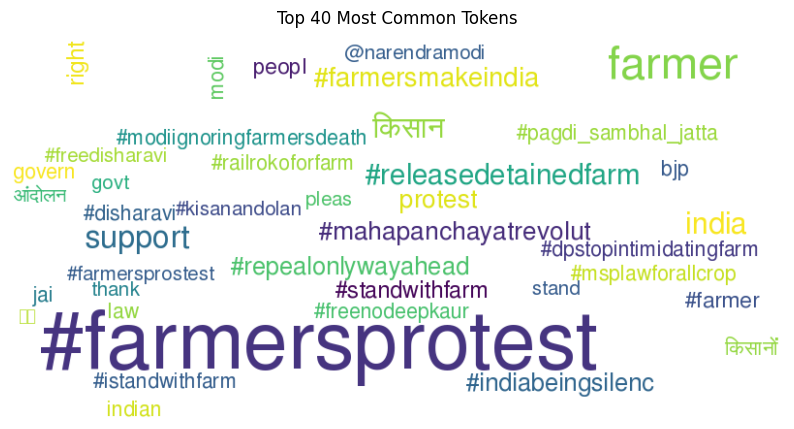

In [ ]:
font = "gargi.ttf"

wordcloud = WordCloud(
    width=800,         # width of the word cloud
    height=400,        # height of the word cloud
    background_color='white',  # background color
    colormap='viridis',         # color scheme for the words
    font_path= font,
    max_words=100)
wordcloud.generate_from_frequencies(dict(list(sorted_tokens.items())[:40]))

plt.figure(figsize=(10,6))
plt.title(f"Top 40 Most Common Tokens")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

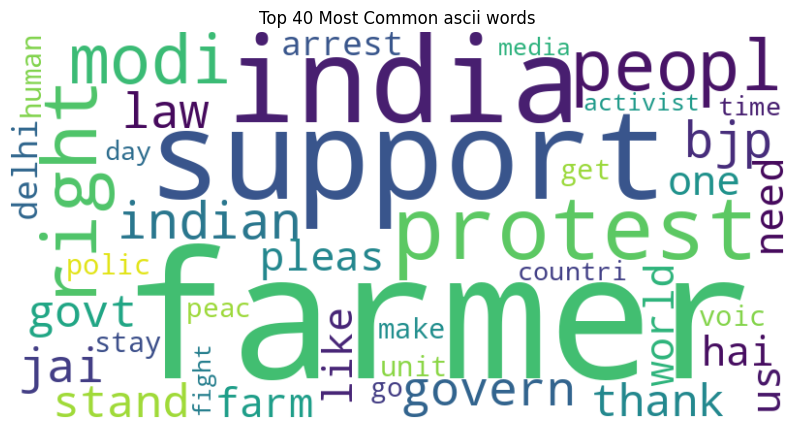

In [ ]:
wordcloud = WordCloud(
    width=800,         # width of the word cloud
    height=400,        # height of the word cloud
    background_color='white',  # background color
    colormap='viridis',         # color scheme for the words
    max_words=100)
wordcloud.generate_from_frequencies(dict(list(filtered_tokens.items())[:40]))

plt.figure(figsize=(10,6))
plt.title(f"Top 40 Most Common ascii words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.axis('off')

In [ ]:
retweetsList = []
likesList = []

for tweet in processed_tweets1:
    retweetsList.append(tweet['retweets'])
    likesList.append(tweet['likes'])

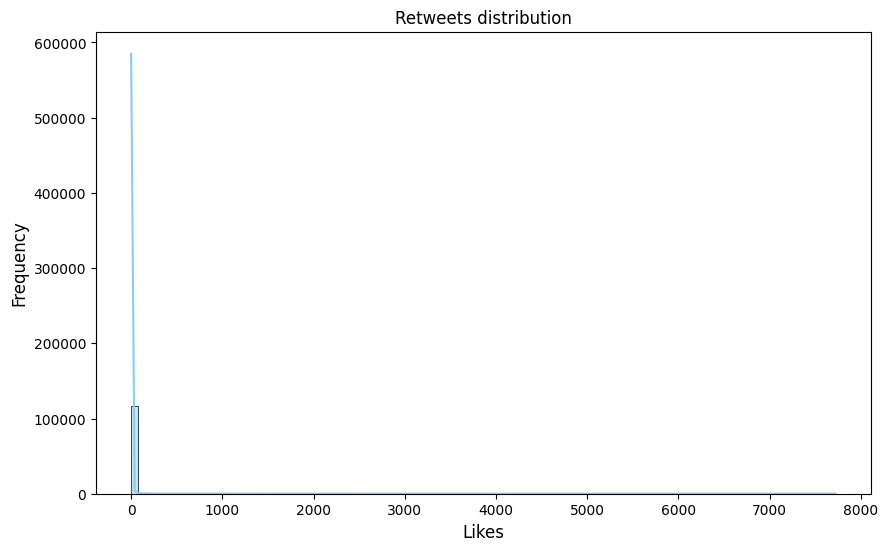

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(retweetsList, bins=100, kde=True, color="skyblue")
plt.title(f"Retweets distribution")
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

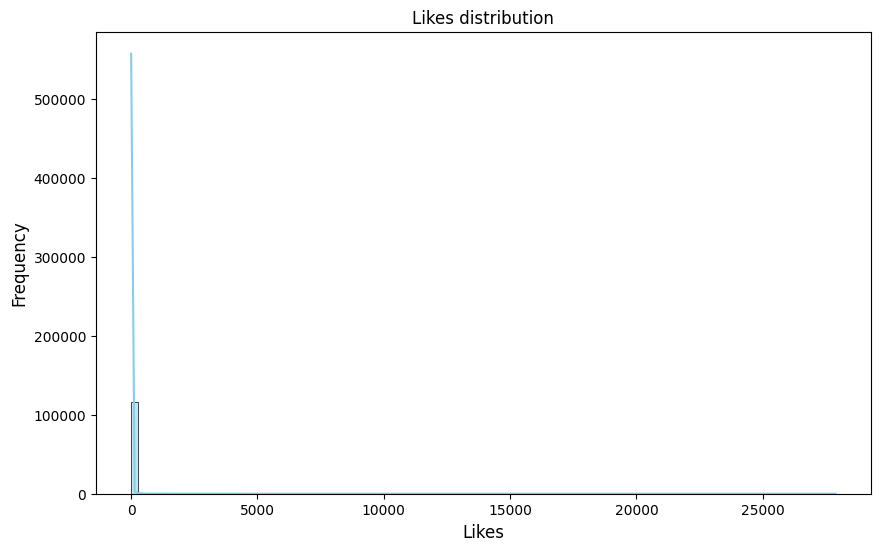

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(likesList, bins=100, kde=True, color="skyblue")
plt.title(f"Likes distribution")
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
sorted_tweets_by_likes = sorted(processed_tweets1, key=lambda item:item['likes'], reverse=True)
print('The most liked tweets are the following:')
for i in range(5):
    print('-------> Top', i + 1, 'tweet with ', sorted_tweets_by_likes[i]['likes'],' likes:')
    print(sorted_tweets_by_likes[i]['tweet'])
    print('-------> from user: ', sorted_tweets_by_likes[i]['userName'],'\n')

The most liked tweets are the following:
-------> Top 1 tweet with  27888  likes:
There's a #FarmersProtest happening in Germany.

But the German Govt didnтАЩt block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an тАШinternal matterтАЩ where others canтАЩt comment. I guess thatтАЩs how democracies work. https://t.co/pZtigTgWT8
-------> from user:  dhruv_rathee 

-------> Top 2 tweet with  25824  likes:
рдордзреНрдпрдкреНрд░рджреЗрд╢ рдореЗрдВ рдирд┐рдЬреА рд╡реНрдпрд╛рдкрд╛рд░реА 200 рдХрд░реЛрдбрд╝ рдХрд╛ рдзрд╛рди рдЦрд░реАрджрдХрд░ рднрд╛рдЧ рдЧрдпрд╛ред рдХрд┐рд╕рд╛рди рдкреИрд╕реЗ рдХреЗ рд▓рд┐рдП рдзрд░рдирд╛ рджреЗ рд░рд╣реЗ рд╣реИред
рдЕрдм рднреА рдмрддрд╛рдирд╛ рдкрдбрд╝реЗрдЧрд╛ рдХрд╛рд▓рд╛ рдХреНрдпрд╛ рд╣реИ
#FarmLaws #FarmersProtest #рдХрд┐рд╕рд╛рди_рдПрдХрддрд╛_рдЬрд┐рдВрджрд╛рдмрд╛рдж
-------> from user:  RakeshTikaitBKU 

-------> Top 3 tweet with  19284  likes:
рд▓рд╣рд░реЛрдВ рдХреЛ рдЦрд╝рд╛рдореЛрд╢ рд

In [ ]:
likesList.sort(reverse=False)
likesList= np.array(likesList)

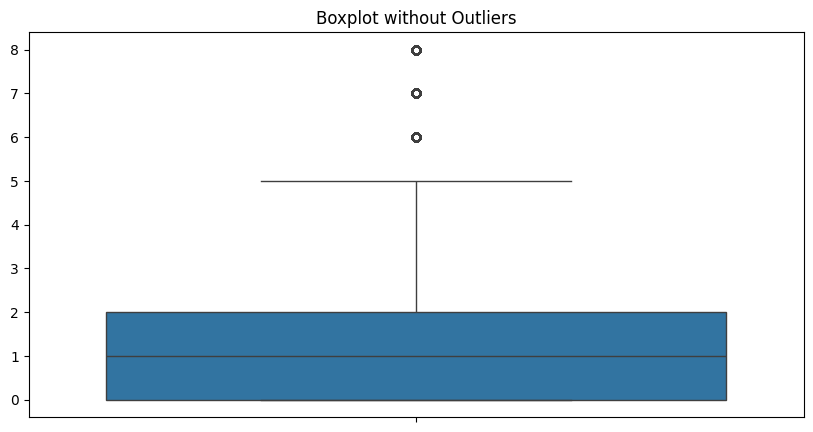

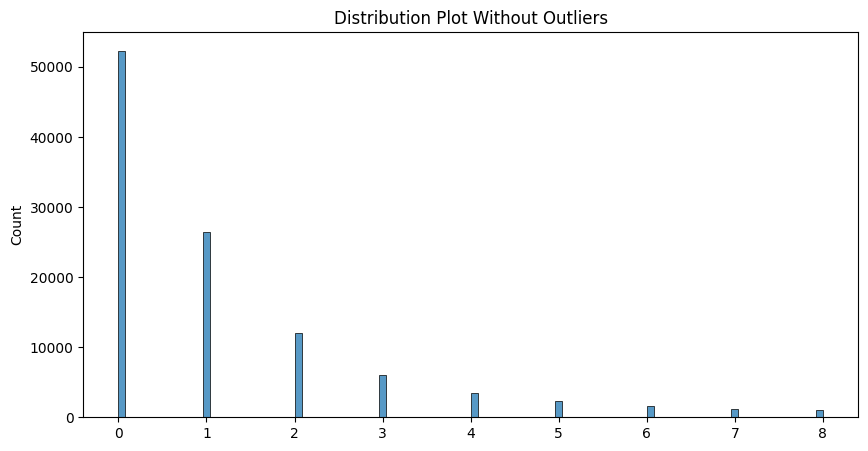

Cleaned Data (Without Outliers): [0 0 0 ... 8 8 8]


In [ ]:
upper_bound = np.percentile(likesList, 90)
cleaned_data = likesList[(likesList <= upper_bound)]
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned_data)
plt.title("Boxplot without Outliers (top 10%)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data, bins=100)
plt.title("Distribution Plot Without Outliers (top 10%)")
plt.show()

# Optional: Print cleaned data for confirmation
print("Cleaned Data (Without Outliers):", cleaned_data)

In [ ]:
no0likes = likesList[likesList > 100]

In [ ]:
print('Out of the ', len(likesList), ' ther are ', len(no0likes), ' tweets with more than 100 likes')

Out of the  117407  ther are  2119  tweets with more than 100 likes


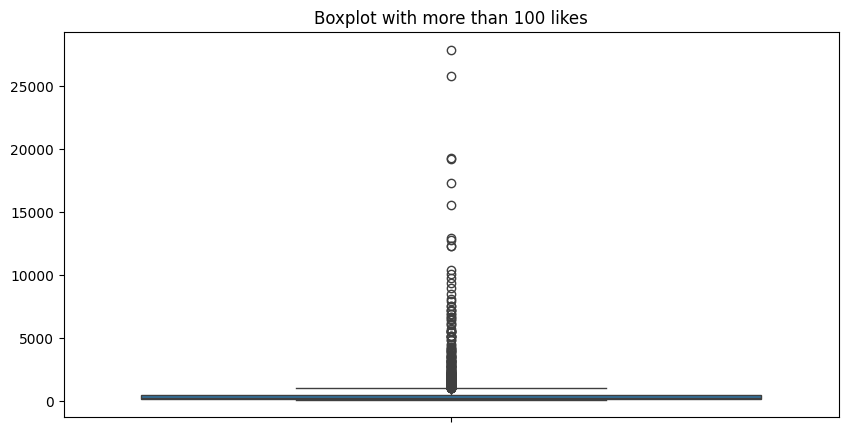

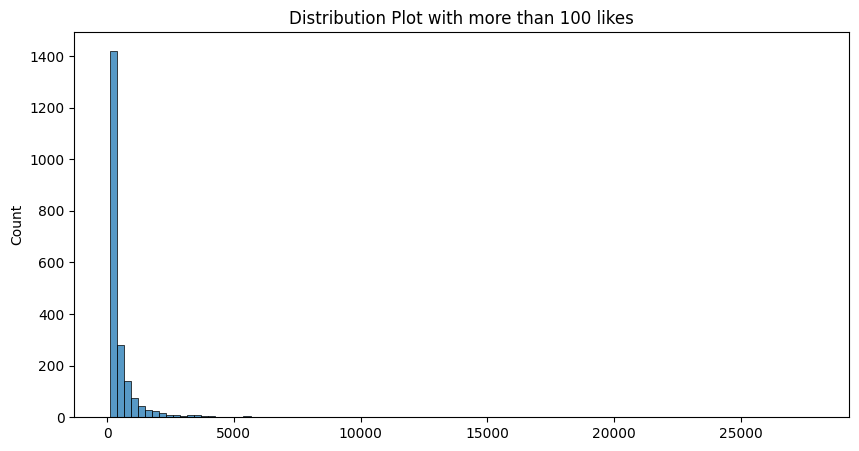

Cleaned Data (Without 0s): [  101   101   101 ... 19284 25824 27888]


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=no0likes)
plt.title("Boxplot with more than 100 likes")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(no0likes, bins=100)
plt.title("Distribution Plot with more than 100 likes")
plt.show()

# Optional: Print cleaned data for confirmation
print("Cleaned Data (Without 0s):", no0likes)

We will now do the same but for the number of retweets:

In [ ]:
sorted_tweets_by_retweets = sorted(processed_tweets1, key=lambda item:item['retweets'], reverse=True)
print('The most liked tweets are the following:')
for i in range(5):
    print('-------> Top', i + 1, 'tweet with ', sorted_tweets_by_retweets[i]['retweets'],' retweets:')
    print(sorted_tweets_by_retweets[i]['tweet'])
    print('-------> from user: ', sorted_tweets_by_retweets[i]['userName'],'\n')

The most liked tweets are the following:
-------> Top 1 tweet with  7723  retweets:
рдордзреНрдпрдкреНрд░рджреЗрд╢ рдореЗрдВ рдирд┐рдЬреА рд╡реНрдпрд╛рдкрд╛рд░реА 200 рдХрд░реЛрдбрд╝ рдХрд╛ рдзрд╛рди рдЦрд░реАрджрдХрд░ рднрд╛рдЧ рдЧрдпрд╛ред рдХрд┐рд╕рд╛рди рдкреИрд╕реЗ рдХреЗ рд▓рд┐рдП рдзрд░рдирд╛ рджреЗ рд░рд╣реЗ рд╣реИред
рдЕрдм рднреА рдмрддрд╛рдирд╛ рдкрдбрд╝реЗрдЧрд╛ рдХрд╛рд▓рд╛ рдХреНрдпрд╛ рд╣реИ
#FarmLaws #FarmersProtest #рдХрд┐рд╕рд╛рди_рдПрдХрддрд╛_рдЬрд┐рдВрджрд╛рдмрд╛рдж
-------> from user:  RakeshTikaitBKU 

-------> Top 2 tweet with  6164  retweets:
There's a #FarmersProtest happening in Germany.

But the German Govt didnтАЩt block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an тАШinternal matterтАЩ where others canтАЩt comment. I guess thatтАЩs how democracies work. https://t.co/pZtigTgWT8
-------> from user:  dhruv_rathee 

-------> Top 3 tweet with  4673  retweets:
disha ravi, a 21-year-old climate acti

In [ ]:
for i in range(10):
    print('-> Top', i + 1, 'tweet with most retweet, id:', sorted_tweets_by_retweets[i]['docNum'])
    print('-> Top', i + 1, 'tweet with most likes, id:  ', sorted_tweets_by_likes[i]['docNum'])
    print('\n')


-> Top 1 tweet with most retweet, id: doc_113632
-> Top 1 tweet with most likes, id:   doc_3203


-> Top 2 tweet with most retweet, id: doc_3203
-> Top 2 tweet with most likes, id:   doc_113632


-> Top 3 tweet with most retweet, id: doc_38410
-> Top 3 tweet with most likes, id:   doc_83874


-> Top 4 tweet with most retweet, id: doc_38012
-> Top 4 tweet with most likes, id:   doc_65353


-> Top 5 tweet with most retweet, id: doc_46206
-> Top 5 tweet with most likes, id:   doc_46206


-> Top 6 tweet with most retweet, id: doc_27071
-> Top 6 tweet with most likes, id:   doc_62412


-> Top 7 tweet with most retweet, id: doc_45142
-> Top 7 tweet with most likes, id:   doc_45142


-> Top 8 tweet with most retweet, id: doc_83874
-> Top 8 tweet with most likes, id:   doc_96125


-> Top 9 tweet with most retweet, id: doc_65353
-> Top 9 tweet with most likes, id:   doc_88771


-> Top 10 tweet with most retweet, id: doc_62412
-> Top 10 tweet with most likes, id:   doc_38262




In [ ]:
retweetsList.sort(reverse=False)
retweetsList= np.array(retweetsList)

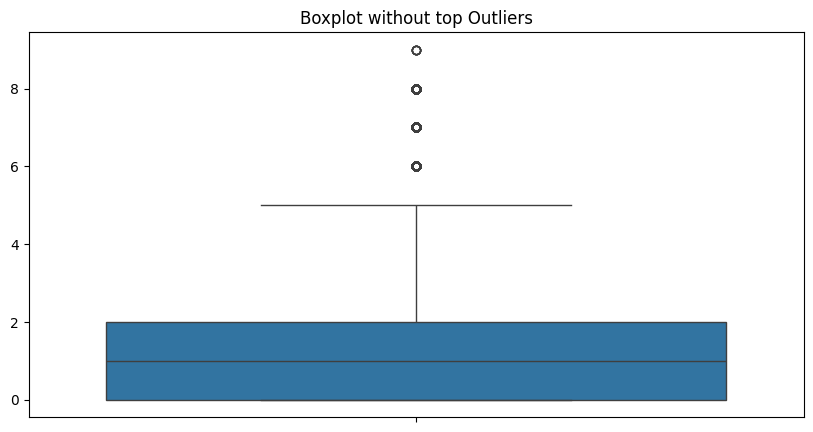

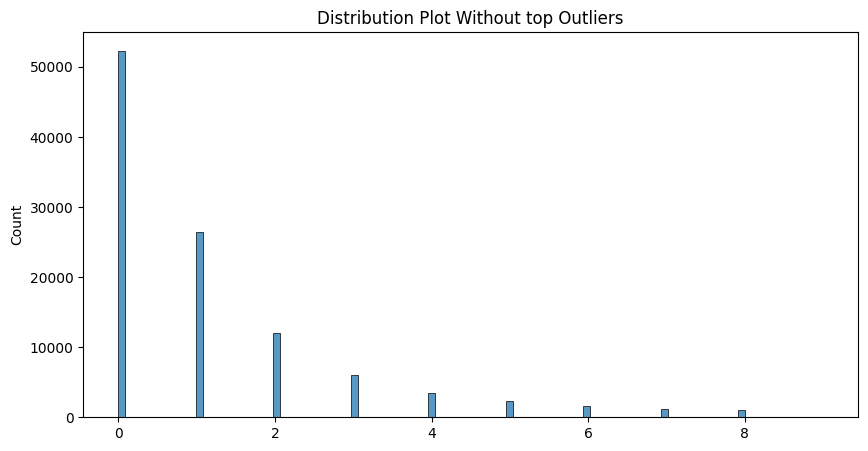

Cleaned Data (Without top Outliers): [0 0 0 ... 9 9 9]


In [ ]:
upper_bound = np.percentile(retweetsList, 90)
cleaned_data = likesList[(retweetsList <= upper_bound)]
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned_data)
plt.title("Boxplot without top Outliers")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data, bins=100)
plt.title("Distribution Plot Without top Outliers")
plt.show()

print("Cleaned Data (Without top Outliers):", cleaned_data)

In [ ]:
no0retweets = retweetsList[retweetsList > 100]

In [ ]:
no0retweets

array([ 101,  101,  101, ..., 4673, 6164, 7723])

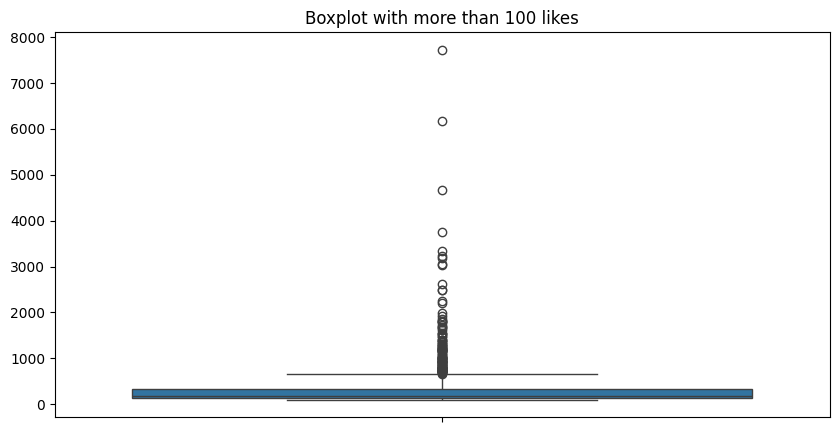

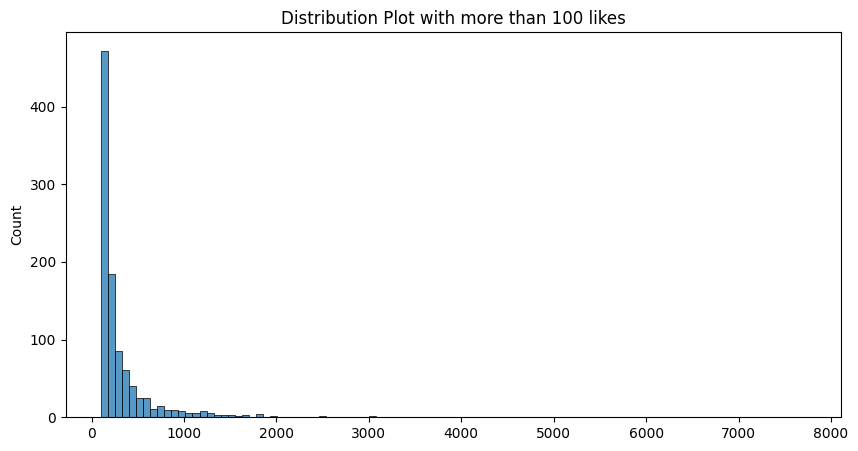

Cleaned Data (with more than 100 likes): [ 101  101  101 ... 4673 6164 7723]


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=no0retweets)
plt.title("Boxplot with more than 100 likes")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(no0retweets, bins=100)
plt.title("Distribution Plot with more than 100 likes")
plt.show()

print("Cleaned Data (with more than 100 likes):", no0retweets)